In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [10]:
#import and explore data
path = 'C:/Users/jghhd/inz/cards_datasets/'
path_train = os.path.join(path,'train')
path_test = os.path.join(path,'test')
print(path_train)

train = pd.read_csv(os.path.join(path,'train_labels.csv'))
test = pd.read_csv(os.path.join(path,'test_labels.csv'))
print(train.shape)
print(test.shape)
print('_' * 49)
print(train.head())
print('_' * 100)
print(test.head())
print(train['class'].unique())

C:/Users/jghhd/inz/cards_datasets/train
(527, 8)
(143, 8)
_________________________________________________
          filename  width  height  class  xmin  ymin  xmax  ymax
0   cam_image1.jpg    480     270  queen   173    24   260   137
1   cam_image1.jpg    480     270  queen   165   135   253   251
2   cam_image1.jpg    480     270    ten   255    96   337   208
3  cam_image10.jpg    960     540    ten   501   116   700   353
4  cam_image10.jpg    960     540  queen   261   124   453   370
____________________________________________________________________________________________________
         filename  width  height class  xmin  ymin  xmax  ymax
0  cam_image2.jpg    960     540  king   312    30   485   249
1  cam_image2.jpg    960     540  king   514    24   694   245
2  cam_image2.jpg    960     540  king   305   263   489   519
3  cam_image2.jpg    960     540  king   515   267   704   523
4  cam_image4.jpg    960     540  jack   297    18   459   237
['queen' 'ten' 'nine' '

(113, 87, 3)


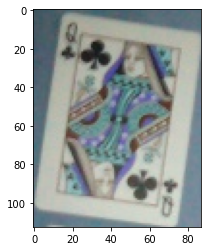

(116, 88, 3)


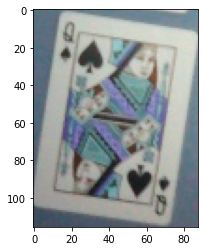

(112, 82, 3)


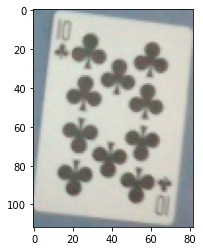

(237, 199, 3)


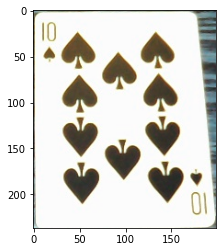

(246, 192, 3)


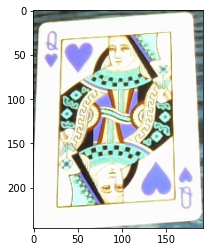

(300, 265, 3)


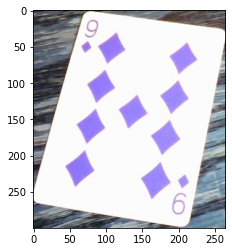

(240, 198, 3)


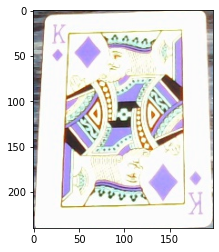

(246, 201, 3)


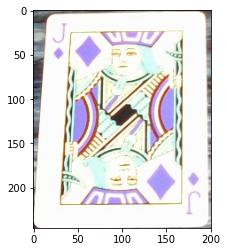

(253, 215, 3)


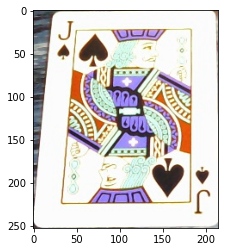

(276, 222, 3)


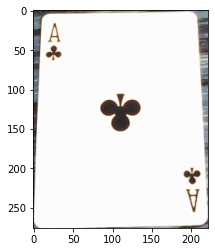

In [11]:
#display crop image
for i in range(10):
    row = train.iloc[i]
#     print(path_train)
    img = cv2.imread(os.path.join(path_train, row['filename']))
#     print(img.shape)
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    crop_img = img[ymin:ymax, xmin:xmax]
    print(crop_img.shape)
    plt.imshow(crop_img)
    plt.show()


In [12]:
height_crop_image = 250
weight_crop_image = 200


def create_data():
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    classes = ["queen", "ten", "nine", "king", "jack", "ace"]

    m_train = train.shape[0]
    m_test = test.shape[0]

    for i in range(m_train):
        row = train.iloc[i]
        img = cv2.imread(os.path.join(path_train, row["filename"]))
        xmin = row["xmin"]
        xmax = row["xmax"]
        ymin = row["ymin"]
        ymax = row["ymax"]
        c = row["class"]

        y_train.append(classes.index(c))
        crop_img = img[ymin:ymax, xmin:xmax]
        crop_img = cv2.resize(crop_img, (weight_crop_image, height_crop_image))
        x_train.append(crop_img)

    for i in range(m_test):
        row = test.iloc[i]
        img = cv2.imread(os.path.join(path_test, row["filename"]))
        xmin = row["xmin"]
        xmax = row["xmax"]
        ymin = row["ymin"]
        ymax = row["ymax"]
        c = row["class"]

        y_test.append(classes.index(c))
        crop_img = img[ymin:ymax, xmin:xmax]
        crop_img = cv2.resize(crop_img, (weight_crop_image, height_crop_image))
        x_test.append(crop_img)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test, classes

In [13]:
x_train_org, y_train_org, x_test_org, y_test_org, classes = create_data()
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)
print(classes)

(527, 250, 200, 3)
(527,)
(143, 250, 200, 3)
(143,)
['queen', 'ten', 'nine', 'king', 'jack', 'ace']


In [14]:
from tensorflow.keras.utils import to_categorical

x_train = x_train_org / 255.0
x_test = x_test_org / 255.0
y_train = to_categorical(y_train_org, 6)
y_test = to_categorical(y_test_org, 6)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [16]:
from keras import regularizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras import backend as K
import keras
import matplotlib.pyplot as plt

weight_decay = 1e-4
model = Sequential()

model.add(
    Conv2D(
        32,
        (3, 3),
        padding="same",
        kernel_regularizer=regularizers.l2(weight_decay),
        input_shape=x_train.shape[1:],
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(
    Conv2D(32, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay))
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(
    Conv2D(64, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay))
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(
    Conv2D(64, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay))
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(
    Conv2D(
        128, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay)
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(
    Conv2D(
        128, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay)
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(6, activation="softmax"))
opt_rms = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_rms, metrics=["accuracy"])

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)
datagen.fit(x_train)
model.fit_generator(
    datagen.flow(x_train, y_train),
    epochs=30,
    validation_data = (x_test, y_test), 
    steps_per_epoch=x_train.shape[0]
)

NameError: name 'train_test_split' is not defined

In [20]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,
)  # randomly flip images
# Split the train and the validation set for the fitting
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)
datagen.fit(x_train)
model.fit(
    datagen.flow(x_train, y_train),
    epochs=30,
    validation_data=(x_test, y_test),
    
    #steps_per_epoch = x_train.shape[0]
)

Epoch 1/30
17/17 [==============================] - 199s 12s/step - loss: 10.3595 - accuracy: 0.5218 - val_loss: 14.9676 - val_accuracy: 0.2448
Epoch 2/30
17/17 [==============================] - 174s 10s/step - loss: 8.9113 - accuracy: 0.5901 - val_loss: 32.7852 - val_accuracy: 0.1818
Epoch 3/30
17/17 [==============================] - 189s 11s/step - loss: 8.8647 - accuracy: 0.5882 - val_loss: 30.1218 - val_accuracy: 0.2517
Epoch 4/30
17/17 [==============================] - 179s 11s/step - loss: 7.6314 - accuracy: 0.6319 - val_loss: 31.8276 - val_accuracy: 0.2308
Epoch 5/30
17/17 [==============================] - 177s 10s/step - loss: 7.7722 - accuracy: 0.6338 - val_loss: 25.1257 - val_accuracy: 0.2937
Epoch 6/30
17/17 [==============================] - 159s 9s/step - loss: 7.0133 - accuracy: 0.6603 - val_loss: 28.6241 - val_accuracy: 0.2727
Epoch 7/30
17/17 [==============================] - 176s 10s/step - loss: 7.9357 - accuracy: 0.6376 - val_loss: 39.7922 - val_accuracy: 0.1888

In [24]:
pred_train= model.predict(x_train)
scores = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.9165085554122925% 
 Error on training data: 0.08349144458770752
Accuracy on test data: 0.8181818127632141% 
 Error on test data: 0.1818181872367859


In [ ]:
tf.cuda.is_available()

In [25]:
img = keras.preprocessing.image.load_img(
    "C:/Users/jghhd/inz/cards_datasets/card_dataset/train/cam_image1.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

NameError: name 'image_size' is not defined

ValueError: cannot reshape array of size 150000 into shape (250,200)

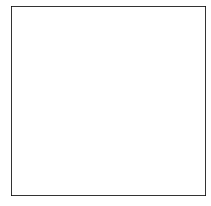

In [37]:
df=train
#labels=list(df['label'])

predictions=model.predict_classes(x_test)

sample=x_test[:16]

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
    plt.xlabel(labels[predictions[i]])
plt.show()